# Day 13

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. 1D data is called series data
2. 2D data is called dataframe data
3. 3D and above data is called panel data

In [2]:
Dataset="../Datasets/"

**There are 3 type of Data structure in pandas**
1. Series: It is 1D array which assign index to each value.
2. Dataframe: It is 2D array. Its a tabular data structure.
3. Panel: It has 3 dimensional and more dimensional array.

# Read CSV file and creating dataframe

In [3]:
cars_df=pd.read_csv(Dataset+'/cars.csv')

In [4]:
#We can change column name to our requirement

cars_df.columns=['Model','Actual_MPG', 'cylinder','Engine_disp', 'horsepower','weight','accelarate','year','origin']

**Correlation**
```
How factor x1  is co related to x2
```

**Here x2 and x1 is changing in same direction this is called Positive Correlation**
<img src="corr.jpg" width="250"/>
```
Closer its to '1' stronger the positive correlation and in other word its 100% positive correlated
```

**Here x2 and x1 is changing in different direction this is called negative correlation**
<img src="corr2.jpg" width="250"/>
```
Closer its to '-1' stronger the negative correlation and in other word its 100% negative correlated
```

**Here x1 changes but has no effect on x2 this is called No correlation or uncorrelated**
<img src="corr3.jpg" width="250"/>

```Point to remember```
1. Correlation coeficieant can be between +1 and -1
2. If correlation is close to +1 its positive correlated and if its close to -1 its negative correlation and if its 0 then no correlation

```
From below considering "Actual MPG" has strong negative correlation with "weight".
```
```
It means If weight increase Acutal MPG will decrease and vice versa.
```
```
From below considering "Actual MPG" has positive correlation with "Accelerated"/"year".
```
```
It means If Accelerate increase Acutal MPG will increase and vice versa.
```
```
If vehicle is newer Acutal MPG will also increase and vice versa.
```

In [5]:
cars_df_correlation=round(cars_df.corr(),2)

# Covarience Is bit technical need to check later
**cars_df.cov()**

## Groupby

In [6]:
cars_grp_median=round(cars_df.groupby('origin').median())

In [7]:
cars_grp_mean=round(cars_df.groupby('origin').mean())

# Pivot Table Demo

**Summerizing data in table in different bucket.A pivot table allows you to extract the significance from a large, detailed data set.**
```Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame```

In [8]:
car_table1=pd.pivot_table(cars_df,values='Actual_MPG',index=['cylinder','origin'], columns='year',aggfunc=np.median)
car_table1

year                 70    71    72    73    74    75    76     77     78  \
cylinder origin                                                             
3        Japanese   NaN   NaN  19.0  18.0   NaN   NaN   NaN  21.50    NaN   
4        American   NaN  24.5  22.0  20.0  26.0  23.0  26.0  27.75  27.55   
         European  25.0  29.0  22.0  24.0  26.0  24.0  27.0  29.75  31.50   
         Japanese  25.5  29.0  25.5  21.0  31.0  26.5  32.0  30.75  28.50   
5        European   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  20.30   
6        American  21.0  18.0   NaN  18.0  17.0  18.0  21.0  18.75  19.80   
         European   NaN   NaN   NaN   NaN   NaN   NaN  16.5    NaN  16.60   
         Japanese   NaN   NaN   NaN  20.0   NaN   NaN  19.0  22.00    NaN   
8        American  14.5  14.0  13.0  13.0  14.0  15.5  14.5  15.75  19.30   

year                  79    80     81    82  
cylinder origin                              
3        Japanese    NaN  23.7    NaN   NaN  
4        American  33.50  27.9  29.95  28.5  
         European  31.90  35.0  30.55  40.0  
         Japanese  32.95  37.0  33.90  36.0  
5        European  25.40  36.4    NaN   NaN  
6        American  21.05  19.1  21.30  25.0  
         European    NaN   NaN  30.70   NaN  
         Japanese    NaN  32.7  24.80   NaN  
8        American  17.90   NaN  26.60   NaN

In [9]:
car_table2=pd.pivot_table(cars_df,values='Actual_MPG',index=['cylinder'], columns='year',aggfunc=np.median)
car_table2

year,70,71,72,73,74,75,76,77,78,79,80,81,82
cylinder,,,,,,,,,,,,,
3,NaN,NaN,19.0,18.0,NaN,NaN,NaN,21.50,NaN,NaN,23.7,NaN,NaN
4,25.0,27.5,23.0,22.0,26.0,24.0,27.0,30.00,29.5,32.70,33.8,32.95,32.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3,25.40,36.4,NaN,NaN
6,21.0,18.0,NaN,18.0,17.0,18.0,19.5,19.00,19.3,21.05,25.9,23.50,25.0
8,14.5,14.0,13.0,13.0,14.0,15.5,14.5,15.75,19.3,17.90,NaN,26.60,NaN


In [10]:
car_table3=pd.pivot_table(cars_df,values='Actual_MPG',index=['cylinder'],aggfunc=np.mean)
car_table3

,Actual_MPG
cylinder,
3,20.550000
4,29.283920
5,27.366667
6,19.973494
8,14.963107


In [11]:
car_comprehensive_table=pd.pivot_table(cars_df,values=['Actual_MPG','weight'],index=['cylinder','origin'],columns=['year','horsepower'] ,aggfunc=np.mean)
car_comprehensive_table

Actual_MPG                                                  \
year                      70                                                   
horsepower               46    85    87    88    90    95    97    113   130   
cylinder origin                                                                
3        Japanese        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4        American        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
         European       26.0   NaN  25.0   NaN  24.0  25.0   NaN  26.0   NaN   
         Japanese        NaN   NaN   NaN  27.0   NaN  24.0   NaN   NaN   NaN   
5        European        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6        American        NaN  21.0   NaN   NaN  21.0  22.0  18.0   NaN   NaN   
         European        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
         Japanese        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8        American        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  18.0   

                          ...    weight                               \
year                      ...        82                                
horsepower          140   ...       82           84      85      86    
cylinder origin           ...                                          
3        Japanese   NaN   ...       NaN          NaN     NaN     NaN   
4        American   NaN   ...    2720.0  2396.666667  2575.0  2790.0   
         European   NaN   ...       NaN          NaN     NaN     NaN   
         Japanese   NaN   ...       NaN          NaN     NaN     NaN   
5        European   NaN   ...       NaN          NaN     NaN     NaN   
6        American   NaN   ...       NaN          NaN  3015.0     NaN   
         European   NaN   ...       NaN          NaN     NaN     NaN   
         Japanese   NaN   ...       NaN          NaN     NaN     NaN   
8        American  17.0   ...       NaN          NaN     NaN     NaN   

                                                                        
year                                                                    
horsepower                 88      90      92      96      110     112  
cylinder origin                                                         
3        Japanese          NaN     NaN     NaN     NaN     NaN     NaN  
4        American  2546.666667  2842.5  2725.0     NaN     NaN     NaN  
         European          NaN     NaN     NaN     NaN     NaN     NaN  
         Japanese  2160.000000     NaN     NaN  2665.0     NaN     NaN  
5        European          NaN     NaN     NaN     NaN     NaN     NaN  
6        American          NaN     NaN     NaN     NaN  2945.0  2835.0  
         European          NaN     NaN     NaN     NaN     NaN     NaN  
         Japanese          NaN     NaN     NaN     NaN     NaN     NaN  
8        American          NaN     NaN     NaN     NaN     NaN     NaN  

[9 rows x 558 columns]

### Below command give the list of dataset available with seaborn

In [12]:
sns.get_dataset_names()

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [13]:
iris= sns.load_dataset('iris')

In [14]:
iris.head(12)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [15]:
irs_df=pd.read_csv(Dataset+'iris.csv')

In [16]:
iris[iris.species=='setosa']

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [17]:
titanic=sns.load_dataset('titanic')

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
irs_df.columns=['sepal_length','sepal_width','petal_length','petal_width','species']

In [21]:
irs_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
irs_df[irs_df.species=='Iris-setosa'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### pairplot as the name suggest it create a pair plot between the columns that has numerical values

```
Eg: sepal length is paired with sep..width, petal length, petal width and so om ...
```

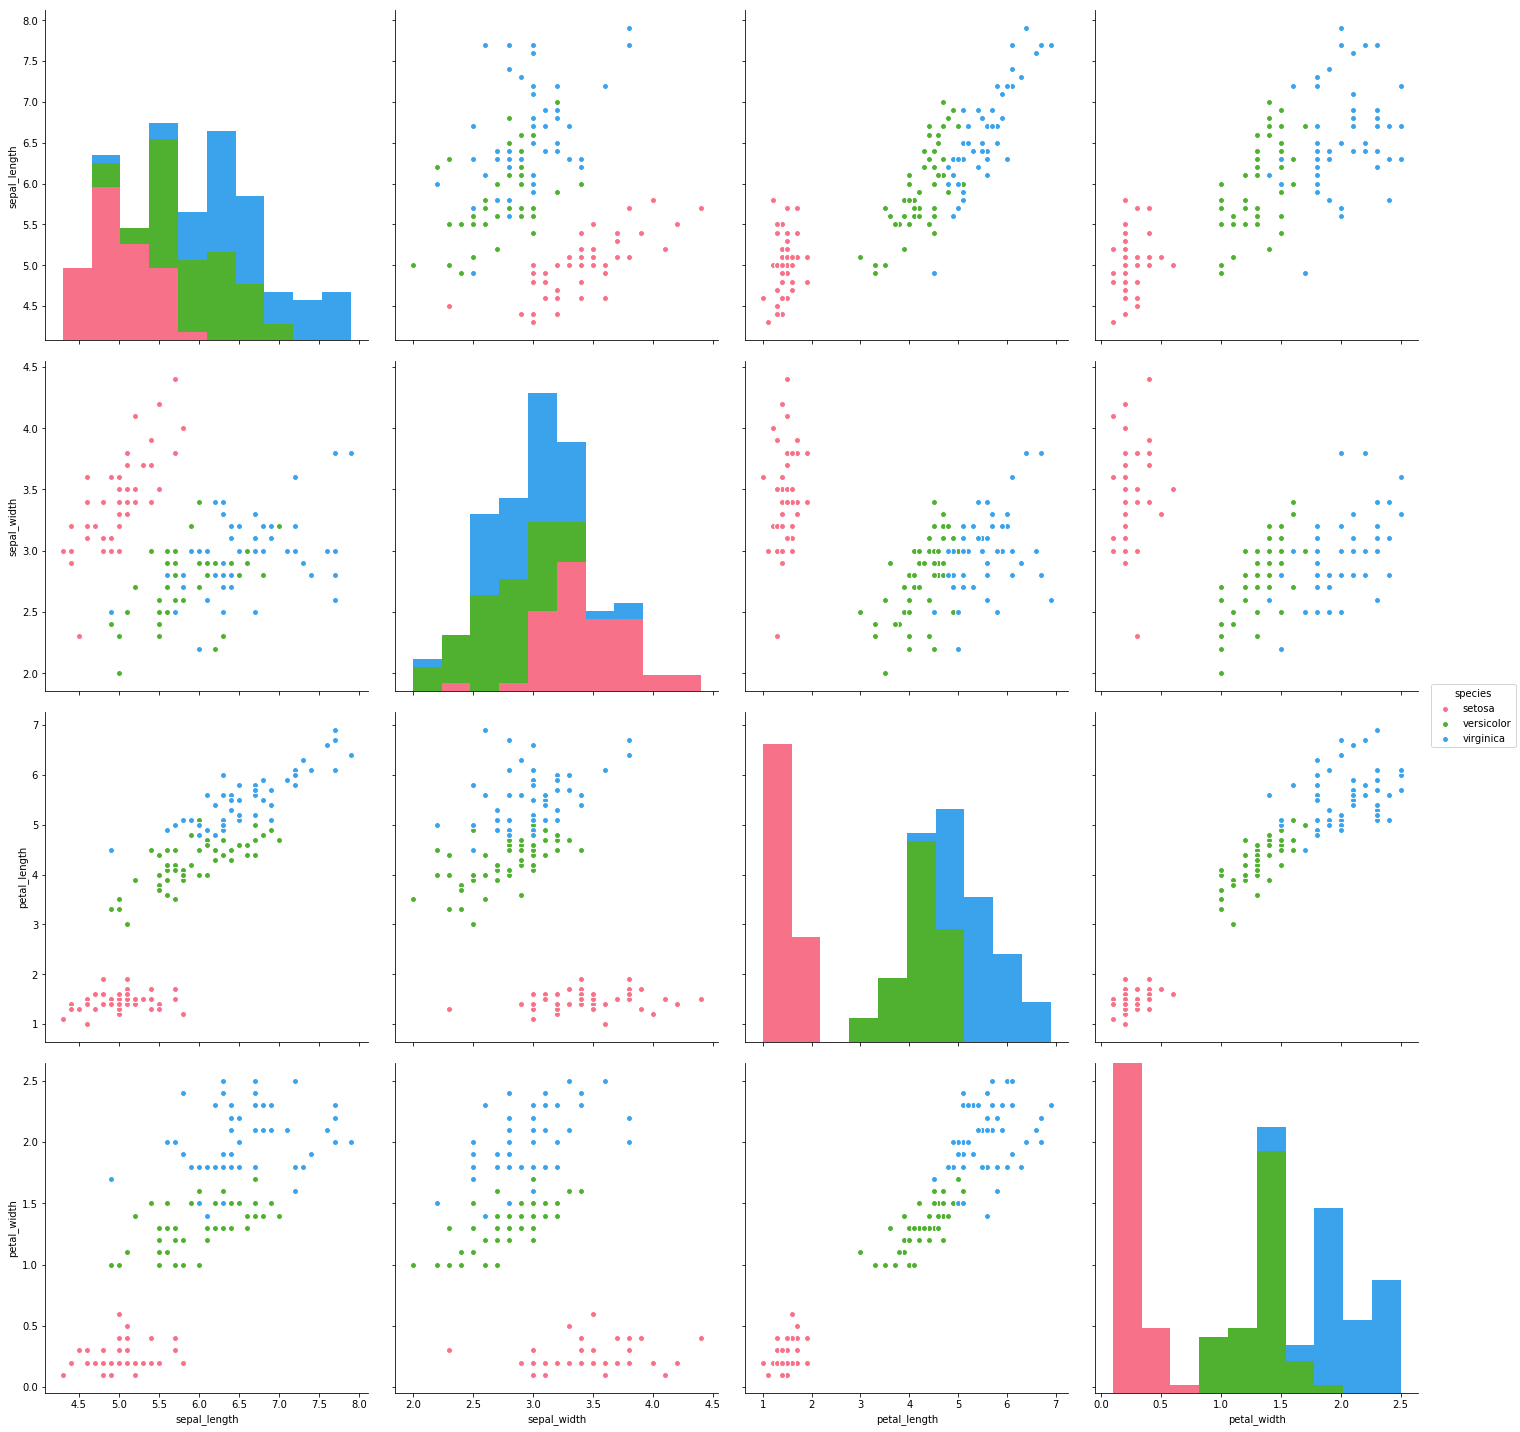

In [23]:
sns.pairplot(iris,hue='species',palette='husl',size=5)
plt.show();

In [24]:
round(iris.corr(),2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


# Merging

In [25]:
left_frame=pd.DataFrame({'key':range(5),'Left_value':['a','b','c','d','e']})

In [26]:
right_frame=pd.DataFrame({'key':range(2,7),'Right_value':['f','g','h','i','j']})

In [27]:
left_frame
right_frame

,Left_value,key
0,a,0
1,b,1
2,c,2
3,d,3
4,e,4


,Right_value,key
0,f,2
1,g,3
2,h,4
3,i,5
4,j,6


In [28]:
pd.merge(left_frame,right_frame,on='key',how='inner')

,Left_value,key,Right_value
0,c,2,f
1,d,3,g
2,e,4,h


In [29]:
pd.merge(left_frame,right_frame,on='key',how='left')

,Left_value,key,Right_value
0,a,0,NaN
1,b,1,NaN
2,c,2,f
3,d,3,g
4,e,4,h


In [30]:
pd.merge(left_frame,right_frame,on='key',how='right')
pd.merge(right_frame,left_frame,on='key',how='right')

,Left_value,key,Right_value
0,c,2,f
1,d,3,g
2,e,4,h
3,NaN,5,i
4,NaN,6,j


,Right_value,key,Left_value
0,f,2,c
1,g,3,d
2,h,4,e
3,NaN,0,a
4,NaN,1,b


In [31]:
pd.merge(left_frame,right_frame,on='key',how='outer')

,Left_value,key,Right_value
0,a,0,NaN
1,b,1,NaN
2,c,2,f
3,d,3,g
4,e,4,h
5,NaN,5,i
6,NaN,6,j


# Concat

```
Concat stack the data frame one above the other or side by side depending on the axis specified
```
```
By default its stacked on basis of row in other word by default axis will be 0
```

In [32]:
pd.concat([left_frame,right_frame])
pd.concat([right_frame,left_frame])

,Left_value,Right_value,key
0,a,NaN,0
1,b,NaN,1
2,c,NaN,2
3,d,NaN,3
4,e,NaN,4
0,NaN,f,2
1,NaN,g,3
2,NaN,h,4
3,NaN,i,5
4,NaN,j,6


,Left_value,Right_value,key
0,NaN,f,2
1,NaN,g,3
2,NaN,h,4
3,NaN,i,5
4,NaN,j,6
0,a,NaN,0
1,b,NaN,1
2,c,NaN,2
3,d,NaN,3
4,e,NaN,4


In [33]:
pd.concat([left_frame,right_frame], axis=1)
pd.concat([right_frame,left_frame], axis=1)

,Left_value,key,Right_value,key
0,a,0,f,2
1,b,1,g,3
2,c,2,h,4
3,d,3,i,5
4,e,4,j,6


,Right_value,key,Left_value,key
0,f,2,a,0
1,g,3,b,1
2,h,4,c,2
3,i,5,d,3
4,j,6,e,4


# Missing data

1. Accuracy in calculation is effected

In [34]:
years = [90, 91, 92, 93, 94, 95]
f1 = {90:8, 91:9, 92:7, 93:8, 94:9, 95:11}
firm1 = pd.Series(f1,index=years)
firm1
f2 = {90:14,92:9, 93:13, 94:5}
firm2 = pd.Series(f2,index=years)
firm2
f3 = {93:10, 94:12, 95: 13}
firm3 = pd.Series(f3,index=years)
firm3
df3 = pd.DataFrame(columns=['Firm1','Firm2','Firm3'],index=years)
df3
df3.Firm1 = firm1
df3.Firm2 = firm2
df3.Firm3 = firm3
df3

90     8
91     9
92     7
93     8
94     9
95    11
dtype: int64

90    14.0
91     NaN
92     9.0
93    13.0
94     5.0
95     NaN
dtype: float64

90     NaN
91     NaN
92     NaN
93    10.0
94    12.0
95    13.0
dtype: float64

,Firm1,Firm2,Firm3
90,NaN,NaN,NaN
91,NaN,NaN,NaN
92,NaN,NaN,NaN
93,NaN,NaN,NaN
94,NaN,NaN,NaN
95,NaN,NaN,NaN


,Firm1,Firm2,Firm3
90,8,14.0,NaN
91,9,NaN,NaN
92,7,9.0,NaN
93,8,13.0,10.0
94,9,5.0,12.0
95,11,NaN,13.0


In [35]:
nadeleted = firm2.dropna()
nadeleted

90    14.0
92     9.0
93    13.0
94     5.0
dtype: float64

In [36]:
cleandf3 = df3.dropna()
cleandf3

,Firm1,Firm2,Firm3
93,8,13.0,10.0
94,9,5.0,12.0


In [37]:
clean2 = df3.dropna(how = 'any')
clean2
clean3 = df3.dropna(how = 'all')
clean3

,Firm1,Firm2,Firm3
93,8,13.0,10.0
94,9,5.0,12.0


,Firm1,Firm2,Firm3
90,8,14.0,NaN
91,9,NaN,NaN
92,7,9.0,NaN
93,8,13.0,10.0
94,9,5.0,12.0
95,11,NaN,13.0


In [38]:
columndrop = df3.dropna(axis=1)
columndrop

,Firm1
90,8
91,9
92,7
93,8
94,9
95,11


In [39]:
df3

,Firm1,Firm2,Firm3
90,8,14.0,NaN
91,9,NaN,NaN
92,7,9.0,NaN
93,8,13.0,10.0
94,9,5.0,12.0
95,11,NaN,13.0


In [40]:
thresholddf = df3.dropna(thresh=2)
thresholddf

,Firm1,Firm2,Firm3
90,8,14.0,NaN
92,7,9.0,NaN
93,8,13.0,10.0
94,9,5.0,12.0
95,11,NaN,13.0
